## matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales.head(3)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3


In [14]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB
None


In [15]:
import numpy as np 

sales['year'] = sales['datesold'].dt.year
result = np.round(sales.groupby('year')['price'].agg(np.mean), 1)
pd.DataFrame(result.head()).T

year,2007,2008,2009,2010,2011
price,522377.2,493814.2,496092.0,559564.8,566715.1


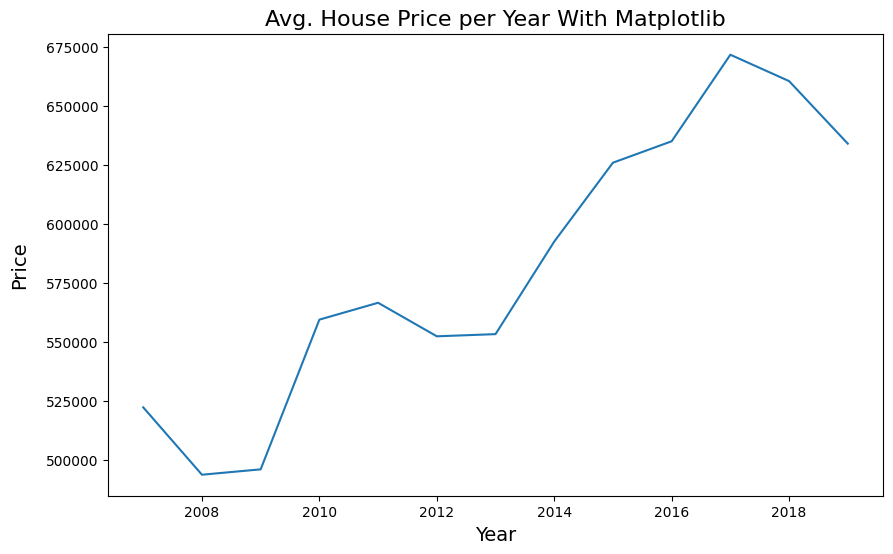

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(result.index, result.values)
ax.set_title('Avg. House Price per Year With Matplotlib', size = 16)
ax.set_xlabel('Year', size = 14)
ax.set_ylabel('Price', size = 14, labelpad=12)
plt.savefig('output/matplotlib01.png', dpi=200)
plt.show()

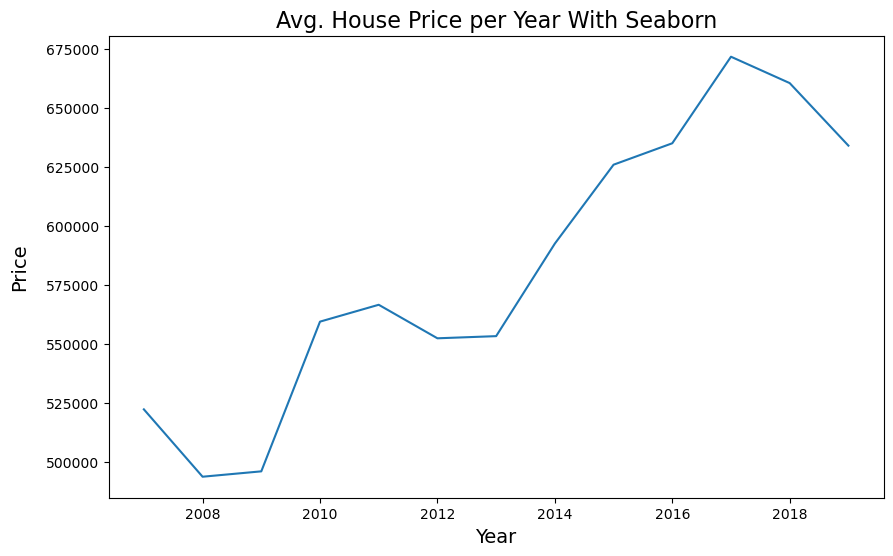

In [36]:
import numpy as np 
import seaborn as sns

sales['year'] = sales['datesold'].dt.year
result = sales.groupby('year')['price'].agg(np.mean)
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=result, x=result.index, y=result.values, ax=ax)
ax.set_title('Avg. House Price per Year With Seaborn', size = 16)
ax.set_xlabel('Year', size = 14)
ax.set_ylabel('Price', size = 14, labelpad=12)
plt.savefig('output/seaborn01.png', dpi=200)
plt.show()